This will import the right packages, data and sets up some variables used throughout the script.

In [22]:
from gekko import Gekko
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd


df=pd.read_excel(r'C:/Users/Chris/Desktop/TEACHNIG 21/Storage optimisation example/Storage optimisation example.xlsx',
                 sheet_name="data",
                 index_col=0)

price=df["price (£/MWh)"].values 
int_charge=0.5 #%
roundtrip_eff=0.7 #%

household_demand=df["household demand (W)"] 
hh_capacity=1000 #Watt hours
hh_discharge=400 #Watt hours

Gekko is the solver which will be used. Setting up the problem requires first defining which input variables are fixed (called "Param" ie the price) and which will be varied (called "Var ie the battery charge state "E_battery" and the timestep discharge "Pc"). The timestep is defined as a range from 0-24.

In [23]:
m = Gekko()

#variables
E_battery = m.Var(lb=0, ub=hh_capacity, value=int_charge*hh_capacity) 
Demand = m.Param(household_demand.values)
Pc = m.Var(lb=-hh_discharge, ub=hh_discharge) 
m.time = np.linspace(0,23, 24)

Equations are used to definte the relationships between the variables- in this case the change in battery charge state per timestep dt is equal to the timestep discharge times the efficiency.

In [24]:
E_price = m.Param(price)
m.Equation(E_battery.dt() == Pc/roundtrip_eff)

Once the problem is defined, we use Maximize to define how the function that the problem will maximize. Then we can solve the problem and print the total income for the time period.

In [30]:
m.Maximize(-E_price*(Pc+Demand))
m.options.IMODE = 6
m.solve(disp=False)

print("FINAL INCOME: £", round(sum([i*j/1000 for i,j in zip(Pc.VALUE,price)])/100,2))

FINAL INCOME: £ -1.32


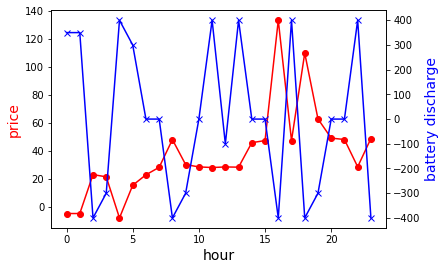

In [31]:
fig,ax = plt.subplots()
ax.plot(m.time, price, color="red", marker="o")
ax.set_xlabel("hour",fontsize=14)
ax.set_ylabel("price",color="red",fontsize=14)

ax2=ax.twinx()
ax2.plot(m.time, Pc.VALUE,color="blue",marker="x")
ax2.set_ylabel("battery discharge",color="blue",fontsize=14)
plt.show()


Repeating the same calculations for the island example:

FINAL INCOME:  1208.5053806178166


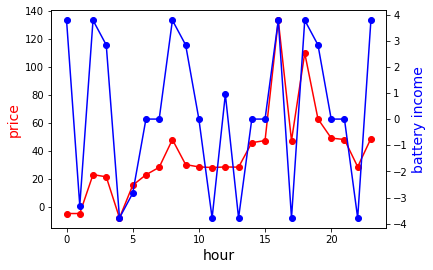

In [34]:
m = Gekko()

hh_number=9451
island_capacity=hh_number*hh_capacity/10**6
island_discharge=hh_number*hh_discharge/10**6

#variables
E_battery = m.Var(lb=0, ub=island_capacity, value=int_charge*island_capacity) 
Pc = m.Var(lb=-island_discharge, ub=island_discharge, value=island_discharge) 

E_price = m.Param(price)
m.time = np.linspace(0,23, 24)

m.Equation(E_battery.dt() == Pc/roundtrip_eff)

m.Maximize(E_price*Pc)
m.options.IMODE = 6
m.solve(disp=False)

print("FINAL INCOME: ", sum([i*j for i,j in zip(Pc.VALUE,price)]))



fig,ax = plt.subplots()
ax.plot(m.time, price, color="red", marker="o")
ax.set_xlabel("hour",fontsize=14)
ax.set_ylabel("price",color="red",fontsize=14)

ax2=ax.twinx()
ax2.plot(m.time, Pc.VALUE,color="blue",marker="o")
ax2.set_ylabel("battery income",color="blue",fontsize=14)
plt.show()

